> TDT4265 - Computer Vision & Deep Learning <br />
> Dionysios Rigatos <br />
> dionysir@stud.ntnu.no <br />

# Exploratory Data Analysis - ASOCA

In this notebook, we will explore the dataset provided for the project. We will try to extract some insights from the data and understand the distribution of the data. We will also visualize the data to get a better understanding of the dataset. 

In [3]:
from monai.apps.auto3dseg import (
    DataAnalyzer,
)

from config.asoca.analyzer import analyzer_cfg_asoca

from utils.data_loaders.asoca_loader import ASOCALoader

from config.asoca.transforms import eda_transforms, key_transforms

import matplotlib.pyplot as plt

## Dataset Image Analysis (w/ Auto3DSeg)

First, we need to extract some information about the dataset images. We will use the Auto3DSeg's DataAnalyzer so as to get insights on data size, spacing, intensity distribution and more.

* We will only do that on the training set, as we do not want to leak any information from the test/validation set.

In [2]:
analyser = DataAnalyzer(**analyzer_cfg_asoca)

datastat = analyser.get_all_case_stats(key="training",
                                       transform_list=None)

2024-04-25 14:45:49,461 - INFO - Found 0 GPUs for data analyzing!
2024-04-25 14:45:49,464 - INFO - device=cuda:0 but CUDA device is not available, using CPU instead.


100%|██████████| 34/34 [01:34<00:00,  2.77s/it]

2024-04-25 14:47:23,626 - INFO - Data spacing is not completely uniform. MONAI transforms may provide unexpected result
2024-04-25 14:47:23,626 - INFO - Writing data stats to data/data_analysis/asoca/stats.yaml.
2024-04-25 14:47:23,633 - INFO - Writing by-case data stats to data/data_analysis/asoca/stats_by_case.yaml, this may take a while.


We now have our values, let's visualize our slices pre-transform.

In [3]:
loader = ASOCALoader(train_transforms=eda_transforms, val_transforms=[])
loader.load_asoca_train()

Loading dataset: 100%|██████████| 6/6 [00:00<00:00, 56048.61it/s]


In [4]:
dataloader_train, _ = loader.get_train_val_dataloaders()
data_dict = iter(dataloader_train)
data_dict = next(data_dict)

In [5]:
image, label = data_dict['image'][0][0].cpu(), data_dict['label'][0][0].cpu()

print(f"image shape: {image.shape}, label shape: {label.shape}")

image shape: torch.Size([512, 512, 202]), label shape: torch.Size([512, 512, 202])


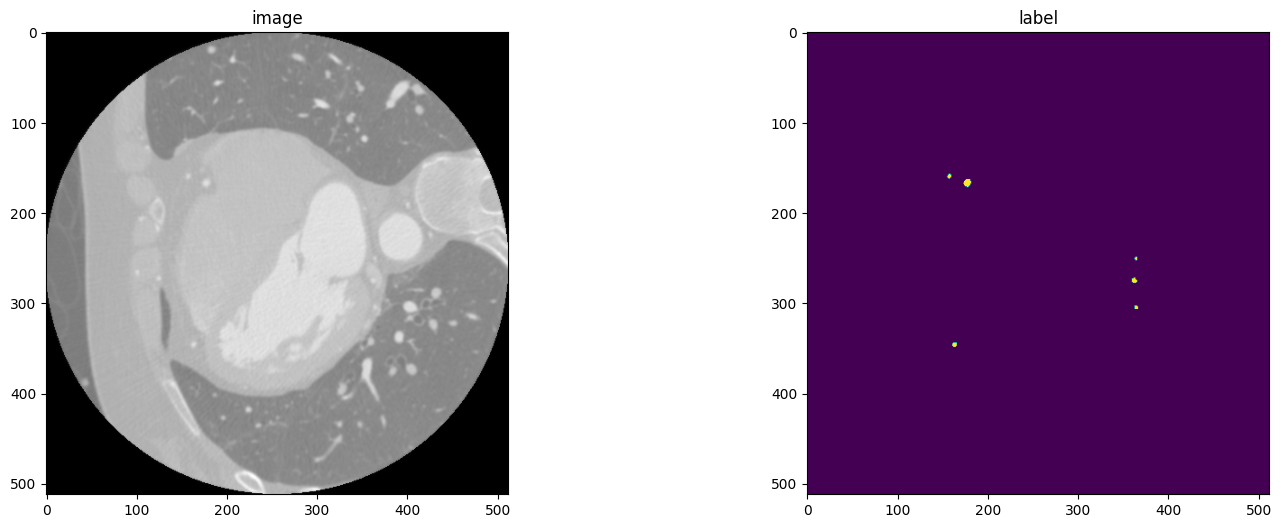

In [26]:
slic = 90

plt.figure("check", (18, 6))
plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(image[:, :, slic], cmap="gray")
plt.subplot(1, 2, 2)
plt.title("label")
plt.imshow(label[:, :, slic])
plt.show()

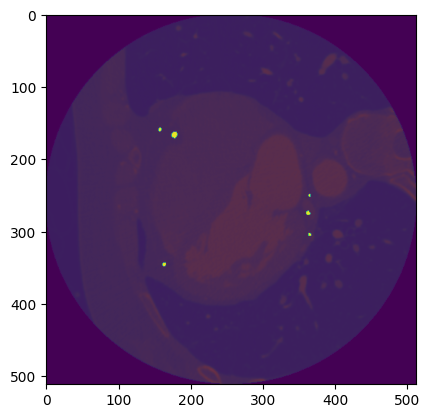

In [27]:
plt.imshow(image[:, :, slic])
plt.imshow(label[:, :, slic], alpha=0.8)
plt.show()

## Post-Transform Visualization

At this stage, we assume that the transformations have been set up with the optimal values (might need to restart notebook and run from this point). We will visualize the images after the transformations to see if the images are still interpretable and if the transformations are working as expected.

In [4]:
loader = ASOCALoader(train_transforms=key_transforms, val_transforms=[])
loader.load_asoca_train()

Loading dataset: 100%|██████████| 6/6 [00:00<00:00, 142179.80it/s]


In [5]:
dataloader_train, _ = loader.get_train_val_dataloaders()
data_dict = iter(dataloader_train)
data_dict = next(data_dict)

In [6]:
image, label = data_dict['image'][0][0].cpu(), data_dict['label'][0][0].cpu()

print(f"image shape: {image.shape}, label shape: {label.shape}")

image shape: torch.Size([448, 448, 226]), label shape: torch.Size([448, 448, 226])


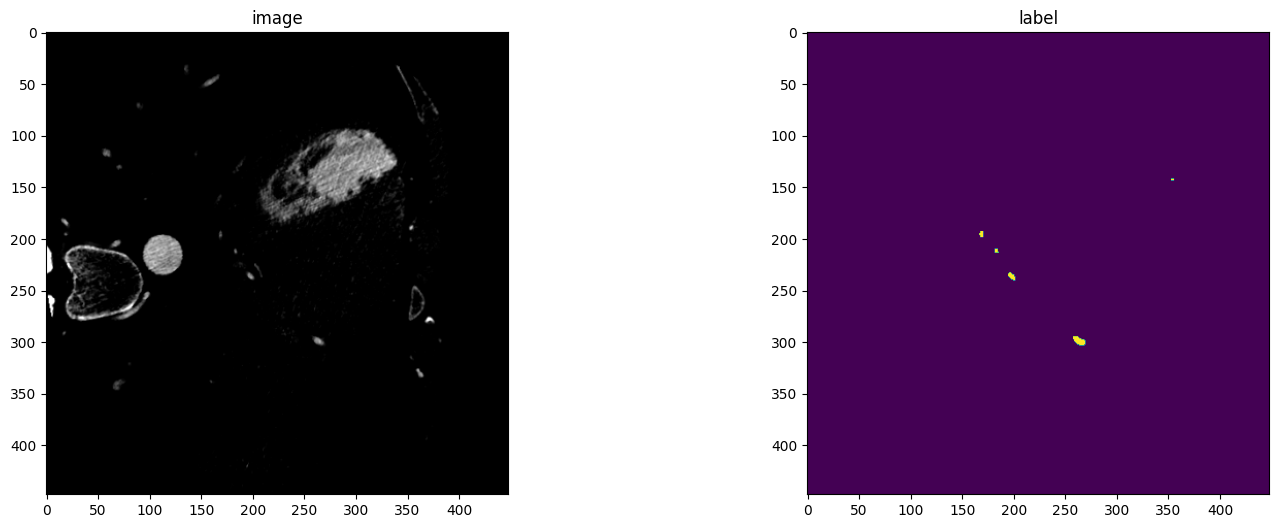

In [28]:
slic = 97

plt.figure("check", (18, 6))
plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(image[:, :, slic], cmap="gray")
plt.subplot(1, 2, 2)
plt.title("label")
plt.imshow(label[:, :, slic])
plt.show()

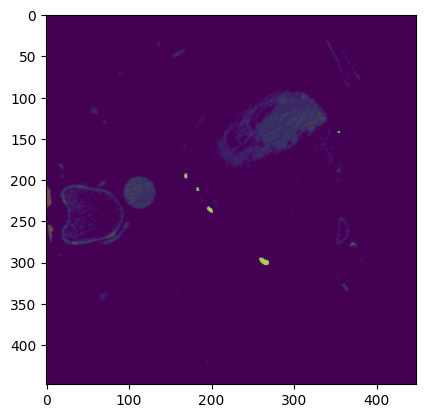

In [29]:
plt.imshow(image[:, :, slic])
plt.imshow(label[:, :, slic], alpha=0.7)
plt.show()